**Coursebook: Unsupervised Learning**

- Part 9 of Data Visualization and Machine Learning for PT Sinar Mas Mining
- Course Length: 9 Hours
- Las Updated: December 2022

---

- Develop by [Algoritma](https://algorit.ma/)'s product division and instructors team

# Background

The coursebook is part of the **Data Science in Python Specialization** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

In this workshop we'll focus our study on a set of widely-used unsupervised learning methods ranging from PCA (Principal Component Analysis), to Clustering, and other pattern discovery approaches where the target variable is not known or defined. Our goal is to develop a solid intuition behind the problem of dimensionality, the mechanism that is at our disposal, and finally solidify our understanding by working on two of the most common real-life business scenarios. 

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Science in Python Specialization**. This is the ninth course, **Unsupervised Learning**. 

- **Dimensionality**

    - The Curse of Dimensionality  
    - Principal Component Analysis  
    - Eigenvector and Eigenvalues  

- **Unsupervised Learning Algorithms I**

    - Rethinking covariance  
    - Visualizing PCA 
    - Practical Applications: eigenfaces
    - PCA for Image Processing

- **Unsupervised Learning Algorithms II**

    - Clustering Methods
    - k-means  
    - Combining PCA with k-means
    
The final part of this course is a Graded Asssignment, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Unsupervised Learning

Throughout the Machine Learning Specialization, we've been learning about algorithms that are greatly useful in situations of regression and classification. More generally, we learn to find the parameters for X1, X2 ... Xn to explain or predict a "target" response Y. 

In the case of unsupervised learning, the situation differs in that there is no such a response Y but rather, we're interested in discovering the structure between X1, X2, to Xn - possibly to identify opportunities for dimensionality reduction or for clustering. Some people have likened unsupervised learning to an exploratory process because it is difficult or impossible to know if the model or any formulation is the "right" one since we don't have a "ground truth" that we use as a measuring stick. Techniques such as cross-validation and AUC do not apply due to the lack of a "ground truth" label. 

With that said, unsupervised learning methods can still be very powerful especially in the field of clustering and dimensionality reduction. In this workshop, we'll take an in-depth look at unsupervised algorithms such as PCA and k-means - and see why unsupervised methods such as these are great tools to add to your toolbox.

# Dimensionality Reduction  
## Principle and Motivation
Machine learning is gaining more and more adoption in fields that deal with high-dimensional data such as handwritten digit recognition, internet-of-things (IOT), and face recognition. As a result, the modern data scientists working with these technologies are faced with a "dimensionality" problem that begs for a methodical solution, not just to reduce the dimensionality of the data but to do so while minimizing the loss of information. 

As a motivational example, think of the case of a low-resolution image. Do a simple google search for black and white faces at 40x40 pixels[^1]. When we treat each image as an input, then our dataset has 1,600 dimensions. 

!["Faces at 40x40px"](assets/face.png)

If you zoom in on the faces, we're looking at 1600 individual pixels. When dealing with grayscale images, a strategy can be assigning a value of lightness on the scale of 0 to 1 to each of the 1,600 columns, with 0 being "full white" and 1 being "full black", and depending on the saturity or lightness of each pixel - assign them a value in between.

!["Faces at 40x40px"](assets/face1.png)


There are numerous good papers and resources that deal with the topic of PCA use in image compression, such as the one by researchers as Institute of Chemical Technology, Prague[^2], the one by Czech Institute of Informatics, Robotics and Cybernetics[^3], and this one here[^4]. By the end of this PCA section, we'll also apply PCA on human faces to see how image compression works in practice. 

A 40x40 image is probably not interesting. If you're building an image classifier using photos from an iPhone 7 plus, that's a resolution of 1,920 x 1,080 pixels (more than 2 million dimensions). And that's for a single observation. Recall from your Practical Statistics course that a way we can measure "information" is through variance, so a dimensionality reduction method is essentially concerned with representing as much "variance" as possible in as few dimensions as possible. 

The outcome of this transformation is that our original data (a matrix $X$) is represented by a linearly transformed matrix, $Z$, where $Z$ is typically a matrix with a lot fewer dimensions (commonly <10) than $X$. The first column of $Z$ explains most of the variance within $X$, and the second explains a smaller amount of variance than the first, and so on until the last column.  

The objective of PCA is to find $Q$, so that such a linear transformation is possible. 

PCA will looks for correlation within our data and use that redundancy to create a new matrix $Z$ with just enough dimensions to explain most of the variance in the original data. The new variables of matrix $Z$ are called **principal components**.

![](assets/pca1.png)

If you look at Figure 1A, our original data sits on a plane with `x`and `y` coordinates. Two dimensions (x and y, respectively) are required in Figure 1A to describe the variance in our data fully. 

However, supposed we identify two other axes to describe the same data, and one of them is directly orthogonal to the other one: we can now measure the variance in our data using just these axes (we call them **principal components**). We identify the PC1 axis as the first principal component because using only one principal component, this would be the one that explain the most amount of variation. The PC2 axis is then selected, again with the objective of explaining the most amount of variation. 

If we hold PC2 as constant (say, 0) then we reduce the dimensions from two to only one, which is by projecting each data point onto PC1. We do lose some variation as our observations are not exactly 0 on the PC2 axis, but since they are very close to being 0, the variation we lose from reducing one dimension is a tradeoff we want to accept.  

(Recall our lessons from Regression Model, when I introduce `VIF` to show how if variable "Police Expenditure this year" can be sufficiently explained by variable "Police Expenditure last year" then we don't need both variables)

Other applications of PCA:  
- Pattern discovery on high dimensional data  
- Identify variables that are highly correlated with others  
- Visualizing high dimensional data

**Dive Deeper:** Which of the two following data set are going to be helped most by Principal Component Analysis (PCA)?

<img src="assets/kc1.png" width="700">

**Import Library**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.decomposition import PCA
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import importlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from helper import biplot_pca, plot_elbow, biplot_kmeans

plt.style.use('seaborn')

## Step-by-step: PCA Analysis on Balance Dataset

In [2]:
balance = pd.read_csv('data_input/balance_agg.csv')
balance.drop(['period'], axis=1, inplace=True)

In [3]:
balance.head()

casa_bal  transfer_in  transfer_out    payment  cash_withdrawal  \
0  126.476481     0.300000      31.87490  27.751619            10.10   
1  132.682221    13.000122       3.10000   3.967350             6.95   
2    3.373993    22.102000       7.90658   1.175000             7.00   
3    8.553664     4.710000       3.02000   2.046142            30.35   
4    5.348829    28.400000      81.80471   2.330000             1.65   

   purchase                           account      account_name  
0  0.615300  d270c073b761b8701ca59435ef1a125b   Karissa Brenner  
1  2.167145  ea3cae43643450090e82d4afceea4197     Damian Yazzie  
2  2.105261  b9256dea133bb9390d0acb2de60e104c   Rida el-Abraham  
3  2.208650  405e4e810e07844600097e7a6c0fc2fb     Miles Tidwell  
4  0.422000  0f1044b4c280ee2e33401a2ee5cb08ae  Joel Fitzsimmons

### Data Preparation


**Pre-process Balance Data**

1. Check Missing Value

In [4]:
balance.isna().sum()

casa_bal           0
transfer_in        0
transfer_out       0
payment            0
cash_withdrawal    0
purchase           0
account            0
account_name       0
dtype: int64

In [5]:
balance = balance.dropna()

2. Check Duplicated value

In [6]:
balance.duplicated().sum()

0

3. Filter data for numerical variable only

In [7]:
cols = ['casa_bal','transfer_in','transfer_out','payment','cash_withdrawal','purchase']
balance_agg = balance[cols]
balance_agg.head()

casa_bal  transfer_in  transfer_out    payment  cash_withdrawal  purchase
0  126.476481     0.300000      31.87490  27.751619            10.10  0.615300
1  132.682221    13.000122       3.10000   3.967350             6.95  2.167145
2    3.373993    22.102000       7.90658   1.175000             7.00  2.105261
3    8.553664     4.710000       3.02000   2.046142            30.35  2.208650
4    5.348829    28.400000      81.80471   2.330000             1.65  0.422000

4. Data Scaling

In [8]:
balance_scaled = StandardScaler().fit_transform(balance_agg.values)


In [9]:
balance_scaled = pd.DataFrame(balance_scaled, columns=[cols])

In [10]:
balance_scaled.head(2)

casa_bal transfer_in transfer_out   payment cash_withdrawal  purchase
0 -0.060914   -0.400638     0.054979  4.013775        0.163660 -0.564542
1 -0.053793   -0.278096    -0.538108 -0.157131       -0.049805  0.059742

We've established earlier that correlations in the data makes some variables redundant. Post-PCA, the matrix $Z$ should be one where every dimension is uncorrelated. 

**Discussion:** Which of the following plot shows variables that are uncorrelated?

<img src="assets/knowledge check (2).png" width="700">

The variables Age and Price in `Sale Price of Vehicle` are not uncorrelated. If you plot a regression line on it, that line exhbit a downward slope, and the correlation between Age and Sales Price would be a value close to -1. 

The variables Temperature and Pressure in `Logistic Machinery` are also not uncorrelated. If you plot a regression line on it, that line exhbit an upward slope, and the correlation between Temperature and Pressure would be a value close to 1. 

Intuitively, we visually conclude that the variables "Blind Tasting" are uncorrelated because knowing the value of x does not give us any indication of what the value of y may be. 

Now if we follow the example in **pca1.png** (from the Principle and Motivation) section and pick a new axis combination for `Logistic Machinery` (which is the purple line labelled `v1` and `v2` in the following picture), then the distributions for temperature and pressure becomes uncorrelated under the two new axes:

<img src="assets/pca2.jpg" width="200">

### [Optional] Eigenvalues and Eigenvectors
If you have limited exposure to Matrix Algebra - feel free to skip this sub-section. Concepts presented under this sub-section will not be graded, in fact R has really convenient built-in functions that help you compute eigenvectors and eigenvalues so the inner-working is for the most part optional for any practitioner. 

In linear algebra and matrix theory, we learn that a vector when multiplied by a matrix, changes its direction. When we take a vector(2,3) and multiply it by a scale, say 2, then the resulting vector would be (4,6) - the scalar scales the vector by a magnitude of 2.

Now if we take the same vector and multiply it by a matrix, the vector being acted on changes direction:

$$
\left(\begin{array}{cc} 
11\\ 
16
\end{array}\right)
=
\left(\begin{array}{cc} 
1 & 3\\ 
2 & 4 
\end{array}\right)
\left(\begin{array}{cc} 
2\\ 
3
\end{array}\right)
$$

In a sense, we can think of the above operation as a matrix transforming a vector into another vector: the resulting vector will (generally) have a different direction and length than the original vector. There are however a few notable exception to this:  

- The matrix that acts on a vector without actually changing it at all is called the **identity matrix**. An identity matrix is a square matrix in which all the elements of the principal diagonal are ones and all other elements are zeros. 

The (2,3) matrix multiplied by an identity matrix of size 2 is going to result as a (2,3); neither the direction or the magnitude is changed.  

- The matrix that rotates every vector through a fixed angle is called a **rotation matrix**. The direction of a vector changes, but not its magnitude. Take the matrix, A, below and multiply it with (-3, 2) to get (3, -2). If you draw the two vectors you'll notice that they are of the same length with the second vector rotated at 180 degree to the first. Multiply A with (-20, 18) and the vector gets transformed to (20, -18), again rotated by 180 degree. As it turns out A is a rotation matrix that will transform a vector by 180 degree but without changing the magnitude of the vector. 

$$
\left(\begin{array}{cc} 
-1 & 0\\ 
0 & -1 
\end{array}\right)
\left(\begin{array}{cc} 
-3\\ 
2
\end{array}\right)
$$ 

<img src="assets/rotation.gif" width="500">

- For most matrices there are certain vectors, called **eigenvectors** whose directions don't change (except when it's scaled by -1, in which case its direction reversed) when acted on by the matrix. The effect on multiplying that matrix by such a vector, its eigenvector, is the same as multiplying the vector by a scalar. This scalar is a constant and is formally referred to as an **eigenvalue**. WHen we multiply matrix A by an eigenvector x, the result would be a constant $\lambda$ multiply by x. The equation is hence:  

$Ax = \lambda x$, where the number $\lambda$ is an eigenvalue of A.

$$
\left(\begin{array}{cc} 
2 & 3\\ 
2 & 1 
\end{array}\right)
\left(\begin{array}{cc} 
3\\ 
2
\end{array}\right)
=
\left(\begin{array}{cc} 
12\\ 
8
\end{array}\right)
=4
\left(\begin{array}{cc} 
3\\ 
2
\end{array}\right)
\\
2\left(\begin{array}{cc} 
3\\ 
2
\end{array}\right) = \left(\begin{array}{cc} 
6\\ 
4
\end{array}\right) \\
\left(\begin{array}{cc} 
2 & 3\\ 
2 & 1 
\end{array}\right)
\left(\begin{array}{cc} 
6\\ 
4
\end{array}\right)
=\left(\begin{array}{cc} 
24\\ 
16
\end{array}\right)
=4
\left(\begin{array}{cc} 
6\\ 
4
\end{array}\right)
$$ 
Observe how a scaled eigenvector is still an eigenvector. 


### Intuition and Practice: PCA
Remember earlier I mention that intuitively, the objective of a PCA is to select new axis (new dimensions) for our plot and that these new dimensions of our data are called **principal components**? The new dimensions should have no correlation to each other (in the context of dimensionality, correlation leads to redundancy!). If we have a covariance matrix:

In [11]:
a = np.matrix('1.04, 0.77; 0.77, 0.68')
a

matrix([[1.04, 0.77],
        [0.77, 0.68]])

Recall from our Practical Statistics workshops that this means the variance of our first variable is 1.04, the variance of the second variable is 0.68 and the covariance between these two is 0.77. 

Now `A` is a square symmetrical matrix, so it can be diagonalized by choosing a new coordinate system given by its eigenvectors, the corresponding eigenvalues will then replace the values on the diagonal. Using this new coordinate system, our covariance matrix A will look like:

In [12]:
np.cov(a)

array([[0.03645, 0.01215],
       [0.01215, 0.00405]])

In [13]:
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

E-value: [1.65075913 0.06924087]
E-vector [[ 0.78346326 -0.6214381 ]
 [ 0.6214381   0.78346326]]


## Application of PCA: Dimensionality Reduction on Balance Data

First, let's take a look at the covariance matrix of the `balance_scaled` dataset :

In [14]:
balance_scaled.cov()

casa_bal transfer_in transfer_out   payment cash_withdrawal  \
casa_bal         1.016949    0.383976     0.857977  0.557141        0.025649   
transfer_in      0.383976    1.016949     0.488854  0.209658        0.428928   
transfer_out     0.857977    0.488854     1.016949  0.523127        0.198359   
payment          0.557141    0.209658     0.523127  1.016949        0.113708   
cash_withdrawal  0.025649    0.428928     0.198359  0.113708        1.016949   
purchase         0.194485    0.339431     0.362734  0.033110        0.066234   

                 purchase  
casa_bal         0.194485  
transfer_in      0.339431  
transfer_out     0.362734  
payment          0.033110  
cash_withdrawal  0.066234  
purchase         1.016949

**Build PCA Model** 

In [15]:
pca = PCA(n_components = 0.80, svd_solver='full')
pca.fit(balance_scaled.values)

PCA(n_components=0.8, svd_solver='full')

In [16]:
pca.n_components_

3

Say we want to retain at least 80% information in new dimension, we can set parameter `n_components`to be 0.8 and then the model will produce 3 PC for our formula. 

Eigen vector information for new formula in PCA :

In [17]:
pd.DataFrame(pca.components_)

0         1         2         3         4         5
0  0.511929  0.409863  0.553440  0.391095  0.203646  0.263092
1 -0.344491  0.460611 -0.136181 -0.382945  0.635367  0.316669
2 -0.022270  0.024281 -0.075609  0.342566  0.541144 -0.763551

**Explained Variance Ratio**

Explained variance ratio tells information proportion about how much information that attribute in each PC. Based on the information below, we got the information that PC1 contains about 45.68% information, PC2 20.25%, and PC3 15.15%.

In [18]:
pca.explained_variance_ratio_

array([0.45687393, 0.20255966, 0.16158637])

To more easily to understand we can calculate cumulative proportion from PC1-PC3. Here below the output said that all of dimension in PC contains about 82.11% information from our original dataset.

In [19]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([45.69, 65.95, 82.11])

**New Value Dimension from PCA Model**

In [20]:
balance_pca = pd.DataFrame(pca.transform(balance_scaled))
balance_pca.head()

0         1         2
0  1.289607 -1.782884  1.882076
1 -0.495208  0.011164 -0.091264
2 -0.677721  0.271034 -0.240222
3 -0.406270  1.165451  0.640042
4  0.018538 -0.431529  0.036270

## PCA Visualization


**Biplot Visualization**

Perform biplot visualization from PC1 and PC2 :

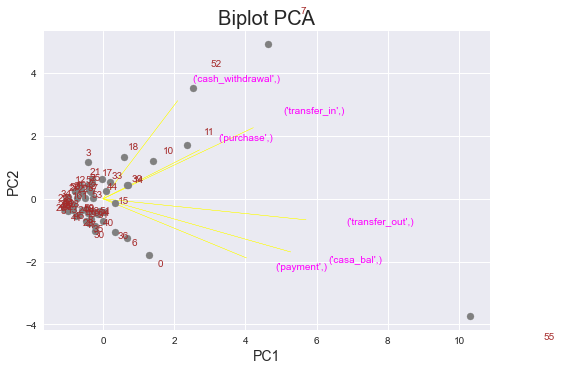

In [21]:
biplot_pca(balance_scaled)

# KMeans Clustering

Clustering refers to the practice of finding meaningful ways to group data (or create subgroups) within a dataset - and the resulting groups are usually called clusters. The objective is to have a number of partitions where the observations that fall into each partition are similar to others in that group, while the partitions are distinctive from one another. 

K-means is a centroid-based clustering algorithm that follows a simple procedure of classifying a given dataset into a pre-determined number of clusters, denoted as “k”. This procedure is essentially a series of interations where we:
1. Find the cluster centers
2. Compute distances between each point to each cluster centers
3. Assign / re-assign cluster membership

A few technicality: Instead of saying “cluster centers”, we’ll call them “centroids”; Also, in the first iteration of the above procedure, because there are clusters in our feature space, we can’t yet compute any centroids so in the first “iteration” we’ll randomly assign our centroids. It turns out, with enough iteration, that the procedure can usually converge at a reasonably well solution, giving us very reasonable k centroids (remember: we define k, just as in the k-NN algorithm we learned) that we can use for clustering task. 

For a deeper understanding, let's take a look at the image below:

<img src="assets/centroids.png" width="500">

If we choose k to be 2, these are the steps that a k-means algorithm take in assigning the original data (green dots) to two clusters:
1. Step (a): Our data on a two-dimensional space
2. Step (b): Iteration 1 - Randomly initialize our cluster centroids
3. Step (c): Iteration 1 - Assigning cluster membership based on a distance function
4. Step (d): Iteration 2 - Move cluster centroids to be at the center of clusters
5. Step (e): Iteration 2 - Re-Assigning cluster membership based on a distance function
6. Step (f): Iteration 3 …

## Understanding and Practicing KMeans

In this part, we will try to practice KMeans with Python. We're going to use sample dataset provided by sklearn dataset.

In [22]:
from sklearn.datasets import load_digits
#Import data from sklearn datasets
data = load_digits().data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape

(1797, 2)

To do a data clustering with KMeans on python, we can use function called `KMeans()`

In [23]:
kmeans = KMeans(n_clusters= 10).fit(df)

We can check the number of iteration of the KMeans for our dataset with `.n_iter_` attribute

In [24]:
kmeans.n_iter_

8

The main output of clustering is data labels. We can check the label created by the model with `.labels_` attribute

In [25]:
label = kmeans.labels_
print(label)

[1 8 9 ... 9 5 2]


We can also the result of clustering with a visualization, usually we will use a biplot (2 dimensional plot) to show the result of clustering.

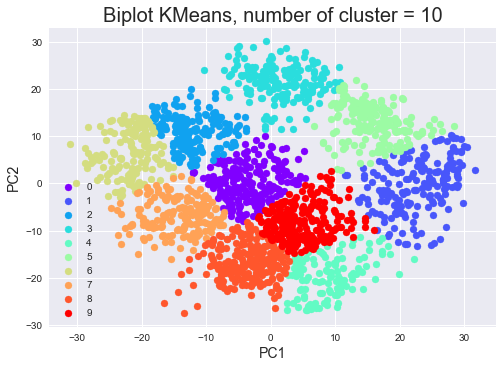

In [26]:
biplot_kmeans(df, k=10)

As we know the goal of KMeans is to create clusters with the least distance between each data on their cluster, we can count them as **within-cluster sum of squared** (WSS). Given the objective of minimizing the **within-cluster sum of squared** the k-means algorithm is guaranteed to converge but is not guaranteed to a global optima - a point we'll learn later through some code experiment.

When we use `.n_iter_`, we see that k-means take only `n` iterations to converge, stopping at the `n`-th iteration: it already identified some sufficiently distinct clusters and further iteration wouldn’t improve it any further. The objective has been satisfied. The original algorithm by Lloyd uses this as the objective (minimizing the within-cluster sum of squares):

<img src="assets/wss.png" width="200">

Where $μi$ is the mean of all the points in cluster $Si$


## Optimal Number of Cluster

Number of cluster, usually called K, depends on number of cluster that business user needs. But **in order to help**, we can also use the WSS to determine number of cluster should be made with KMeans. The method is called elbow method. We can get the WSS of KMeans with `.intertia_` attribute.

In [27]:
kmeans_3 = KMeans(3).fit(df)
kmeans_3.inertia_

217471.60306887838

In [28]:
kmeans_4 = KMeans(4).fit(df)
kmeans_4.inertia_

153979.78829780384

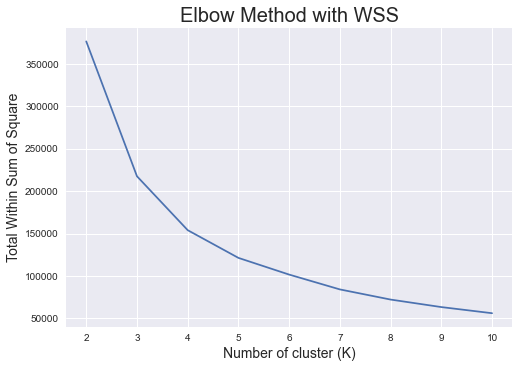

In [29]:
plot_elbow(df)

The plot above represents the variance within the clusters, it decreases as k increases. With elbow method, we want to find "elbow-like" / bend part of the line plot. It showed by the change of steepness / gradients. For example we can see in the plot above, the optimum number of cluster would be `K=4`.

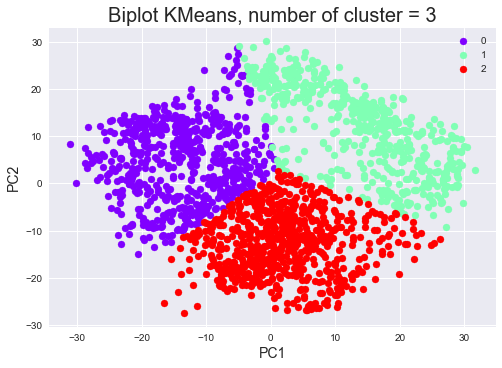

In [30]:
biplot_kmeans(df, k=3)

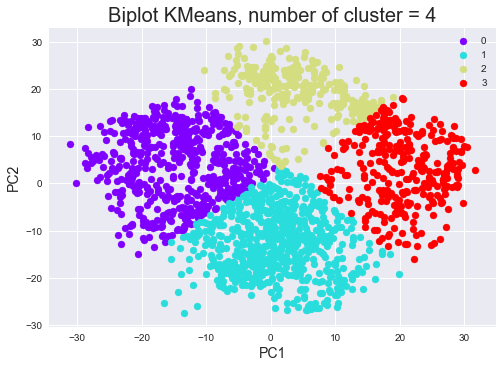

In [31]:
biplot_kmeans(df, k=4)

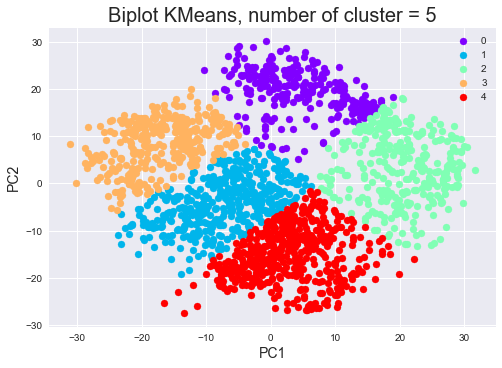

In [32]:
biplot_kmeans(df, k=5)

## Customer Segmentation with KMeans

After we learn how to do clustering and how to determine number of cluster, right now we'll try to cluster our data. Try to run the clustering algorithm for `balance_scaled` dataset.

### Determine number of cluster

Choose the number of cluster (K) with elbow method.

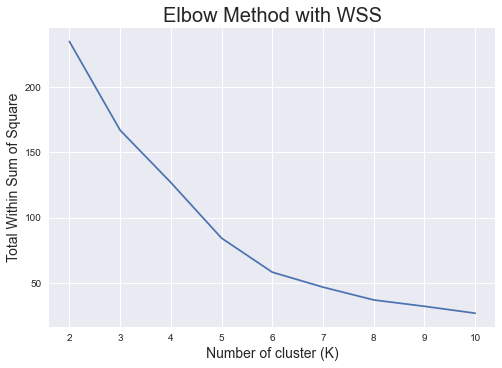

In [33]:
plot_elbow(balance_scaled)

### Clustering data with KMeans


With the elbow method, we can say that the optimum number of K is 6. So we can do clustering with `KMeans()` with the number of k = 6.

In [34]:
np.random.seed(100)
kmeans = KMeans(n_clusters=6).fit(balance_scaled)

In [35]:
label = kmeans.labels_
print(label)

[2 1 1 1 1 1 2 4 2 1 5 5 1 1 5 1 1 1 5 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 2 2
 1 1 5 2 1 1 1 1 1 1 2 1 1 2 2 0 2 1 3 1 1 1 1]


### Visualize Result of Clustering

We can visualize the result of clustering with the selected number of cluster (K)

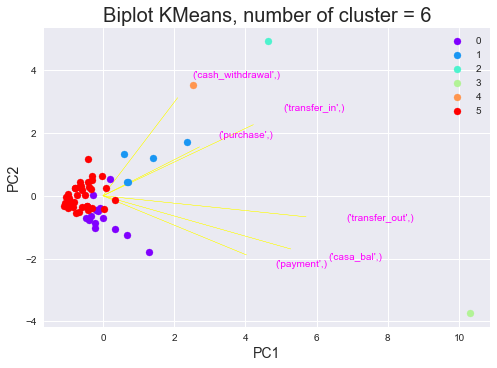

In [36]:
biplot_kmeans(balance_scaled, 6, feature_name=True)

### Customer Profiling

The last part would be the Customer Profiling. In this part we will try to understand the "behaviour" of the cluster based on their data. \
We will create a new dataframe called `balance_clustered`.

In [37]:
balance_clustered = balance_agg.copy()
balance_clustered['label'] = list(label)
balance_clustered.columns = ['casa_bal','transfer_in','transfer_out','payment','cash_withdrawal','purchase','label']
balance_clustered.shape

(60, 7)

We will group all the data into their label and aggregate all the columns to know the cluster's "behaviour"

In [38]:
balance_clustered.groupby('label').mean()

casa_bal  transfer_in  transfer_out    payment  cash_withdrawal  \
label                                                                       
0       184.267100    90.487000    101.272600  10.455910       103.000000   
1        56.452676    16.979105     16.970011   1.853241         5.195974   
2        44.978385    22.646569     20.688815  10.889750         4.464286   
3      6792.174000   275.131400    339.941400  28.462000         4.000000   
4       690.187900   757.658700     70.044550   6.842900        49.600000   
5        66.372484    84.751816     61.337476   4.632463         8.910000   

       purchase  
label            
0      0.214820  
1      1.428238  
2      1.013011  
3      5.596777  
4      4.977735  
5      8.374766